In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train),len(X_test)

60000

5
0
4
1
9


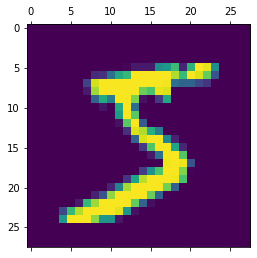

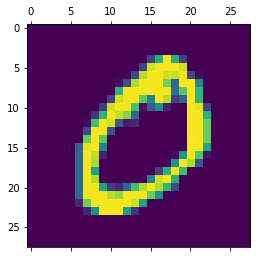

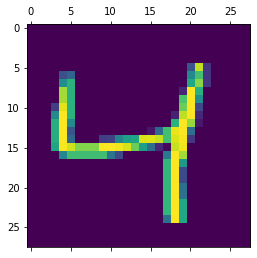

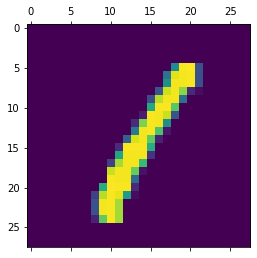

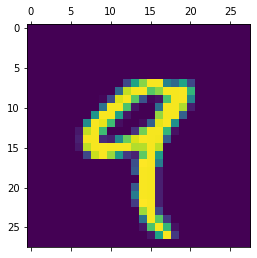

In [5]:
for i in range(5):
    plt.matshow(X_train[i])
    print(y_train[i])

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train_flatten=X_train.reshape(len(X_train),-1)
X_train_flatten.shape

(60000, 784)

In [8]:
X_test_flatten=X_test.reshape(len(X_test),-1)
X_test_flatten.shape

(10000, 784)

* before scaling*

In [9]:
nn=keras.Sequential([
    keras.layers.Dense(500,input_shape=(784,),activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
nn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)
nn.fit(X_train_flatten,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 7ms/step - loss: 1.2133 - accuracy: 0.8612
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2564 - accuracy: 0.9325
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1867 - accuracy: 0.9499
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1550 - accuracy: 0.9590
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1260 - accuracy: 0.9664
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1098 - accuracy: 0.9714
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0973 - accuracy: 0.9747
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0926 - accuracy: 0.9771
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0874 - accuracy: 0.9785
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step - l

In [10]:
X_train_flatten_scaled=X_train_flatten/255
X_test_flatten_scaled=X_test_flatten/255         # color ranges from 0 - 255

In [11]:
nn=keras.Sequential([
    keras.layers.Dense(500,input_shape=(784,),activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
nn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)
nn.fit(X_train_flatten_scaled,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 9ms/step - loss: 0.1939 - accuracy: 0.9406
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0781 - accuracy: 0.9756
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0550 - accuracy: 0.9825
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0417 - accuracy: 0.9862
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0312 - accuracy: 0.9897
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0266 - accuracy: 0.9913
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0220 - accuracy: 0.9924
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0198 - accuracy: 0.9936
Epoch 9/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0177 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - 

In [12]:
nn.evaluate(X_test_flatten_scaled,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0908 - accuracy: 0.9784


[0.0908249020576477, 0.9783999919891357]

In [13]:
y_predicted=nn.predict(X_test_flatten_scaled)
y_predicted[0]

313/313 [==============================] - 1s 3ms/step


array([5.1809357e-06, 8.1346296e-02, 4.2578306e-02, 9.1216117e-02,
       2.1950756e-03, 4.7639855e-06, 4.9166986e-09, 1.0000000e+00,
       5.1715836e-04, 1.5306759e-01], dtype=float32)

In [14]:
np.argmax(y_predicted[0])

7

In [15]:
for y in y_predicted[:5]:
    print(np.argmax(y))

7
2
1
0
4


In [16]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [17]:
predicted_num=[]
for y in y_predicted:
    predicted_num.append(np.argmax(y))

In [18]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=predicted_num)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 977,    0,    0,    0,    0,    0,    1,    1,    1,    0],
       [   3, 1123,    3,    1,    0,    0,    2,    1,    2,    0],
       [   4,    0, 1011,    1,    3,    0,    1,    9,    2,    1],
       [   0,    0,    7,  974,    0,   21,    0,    4,    3,    1],
       [   1,    0,    0,    0,  967,    0,    4,    3,    0,    7],
       [   2,    0,    0,    6,    1,  878,    1,    0,    2,    2],
       [  22,    2,    1,    0,    4,    5,  923,    0,    1,    0],
       [   1,    1,    9,    0,    4,    0,    0, 1010,    1,    2],
       [   4,    0,    5,    2,    4,    6,    2,    4,  944,    3],
       [   1,    2,    0,    1,   15,    9,    0,   11,    1,  969]])>

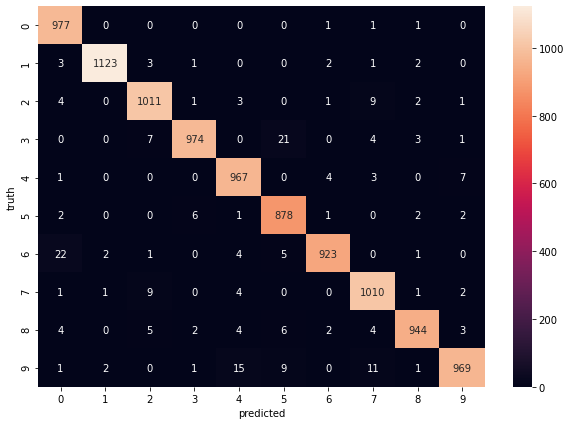

In [19]:
from seaborn import heatmap
plt.figure(figsize=(10,7))
heatmap(cm,annot=True,fmt='g')
plt.xlabel('predicted')
plt.ylabel('truth')
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier
mod=RandomForestClassifier()
mod.fit(X_train_flatten,y_train)
mod.score(X_test_flatten,y_test)

0.9677

### # Using Tensorboard and Flatten

In [21]:
test_adam_nn=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),  # no nessesity of flattening input dataset
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

tb_adam_callback=tf.keras.callbacks.TensorBoard(log_dir="log/adam/",histogram_freq=1)
test_adam_nn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
test_adam_nn.fit(X_train,y_train,epochs=5,callbacks=[tb_adam_callback])

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 2.0170 - accuracy: 0.8130
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4104 - accuracy: 0.8915
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3028 - accuracy: 0.9177
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2629 - accuracy: 0.9306
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2346 - accuracy: 0.9378


In [22]:
test_SGD_nn=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

tb_SGD_callback=tf.keras.callbacks.TensorBoard(log_dir="log/SGD/",histogram_freq=1)

test_SGD_nn.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
test_SGD_nn.fit(X_train,y_train,epochs=5,callbacks=[tb_SGD_callback])

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 16.7114 - accuracy: 0.2036
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.9108 - accuracy: 0.3010
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.9989 - accuracy: 0.2647
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.9665 - accuracy: 0.2720
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.9622 - accuracy: 0.2765


In [23]:
%load_ext tensorboard
%tensorboard --logdir log/

Reusing TensorBoard on port 6006 (pid 21368), started 1:05:32 ago. (Use '!kill 21368' to kill it.)